Question A1: Please perform exploratory data analysis on the dataset to understand the following.
• Data types of attributes
• Missing values if any and how to perform imputations
• Class balance nature of data
• Attribute correlation study with correlation matrix and heatmap plot of the matrix
• Matrix rank study to find the dimensionality of data cloud
• Data range and normalization aspects

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import time

In [24]:
# Load the dataset
def load_data(file_path):
    return pd.read_csv("/content/drive/MyDrive/Custom_CNN_Features.csv")

In [25]:
# Q1: Exploratory Data Analysis
def exploratory_data_analysis(data):
    print("Data Types:\n", data.dtypes)
    print("\nMissing Values:\n", data.isnull().sum())
    print("\nClass Balance:\n", data['Class Label'].value_counts())

    # Drop non-numeric columns for numeric analysis
    numeric_data = data.drop(columns=['Filename'])  # Adjust as per your dataset
    correlation_matrix = numeric_data.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

    rank = np.linalg.matrix_rank(numeric_data.iloc[:, :-1])  # Exclude target column
    print(f"Matrix Rank (Dimensionality): {rank}")
    print("\nData Range (Min-Max Normalization Example):\n", numeric_data.describe())
    return correlation_matrix

In [26]:
# Q2: Train-Test Split and Classification
def classify_and_evaluate(data):
    # Drop non-numeric columns
    data = data.drop(columns=['Filename'])
    X = data.iloc[:, :-1]  # Exclude target column
    y = data['Class Label']

    # Normalize data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    classifiers = {
        'kNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM': SVC(probability=True),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = {}

    for name, clf in classifiers.items():
        start_time = time.time()
        clf.fit(X_train, y_train)
        train_time = time.time() - start_time

        start_time = time.time()
        y_pred = clf.predict(X_test)
        test_time = time.time() - start_time

        metrics = classification_report(y_test, y_pred, output_dict=True)
        try:
            roc_auc = roc_auc_score(pd.get_dummies(y_test), clf.predict_proba(X_test))
        except:
            roc_auc = "NA"

        results[name] = {
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['weighted avg']['precision'],
            'Recall': metrics['weighted avg']['recall'],
            'F1-Score': metrics['weighted avg']['f1-score'],
            'AUROC': roc_auc,
            'Train Time': train_time,
            'Test Time': test_time
        }
        print(f"\n{name} Results:\n", results[name])

    return results

In [27]:
# Q3: Underfitting, Regular Fit, Overfitting
def check_fit(results):
    for name, metrics in results.items():
        print(f"\n{name} Fit Analysis:")
        print(f"Training Time: {metrics['Train Time']:.2f} seconds")
        print(f"Testing Time: {metrics['Test Time']:.2f} seconds")
        if metrics['Accuracy'] > 0.9:
            print("Model seems Regular Fit.")
        elif metrics['Accuracy'] < 0.6:
            print("Model might be Underfitting.")
        else:
            print("Model might be Overfitting.")


--- Exploratory Data Analysis ---
Data Types:
 Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object

Missing Values:
 Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64

Class Balance:
 Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


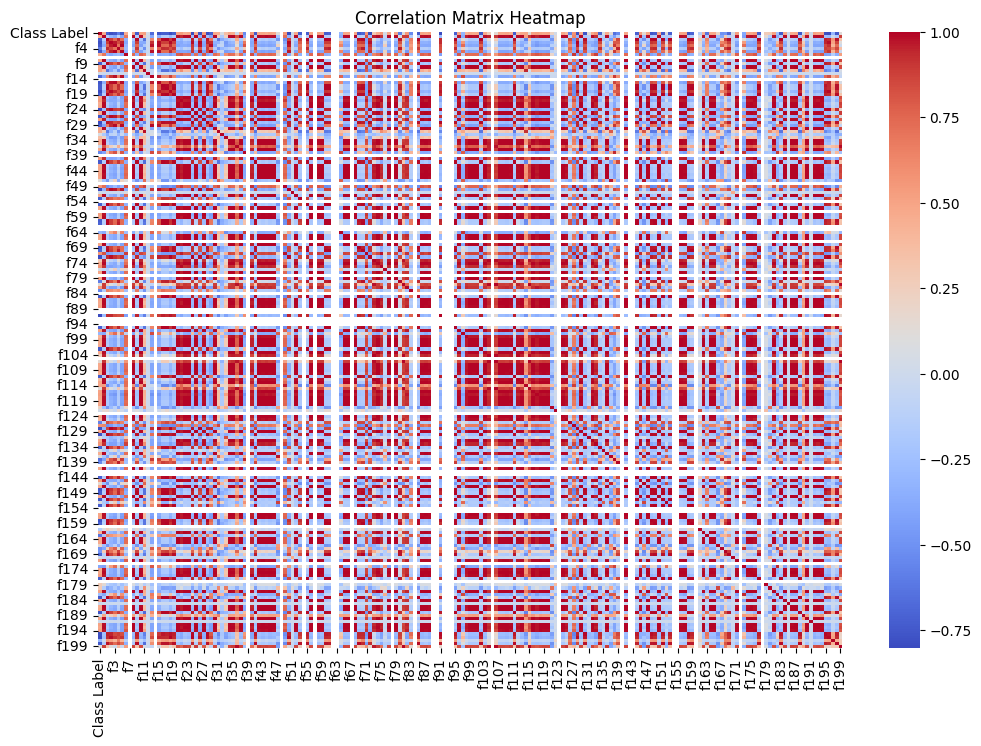

Matrix Rank (Dimensionality): 174

Data Range (Min-Max Normalization Example):
        Class Label           f0           f1           f2           f3  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean      0.849062    17.516938    57.919104   112.822180   170.829473   
std       0.689245    54.948034    93.672074    96.561850   124.512873   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000    46.988506    85.638191   
50%       1.000000     0.000000     0.000000    93.278381   160.636246   
75%       1.000000     0.000000   117.704697   159.855179   248.145508   
max       2.000000   781.789490   459.207794   536.879639   760.753845   

                f4           f5           f6      f7            f8  ...  \
count  3253.000000  3253.000000  3253.000000  3253.0   3253.000000  ...   
mean     17.606476   141.614480    11.035532     0.0    214.312125  ...   
std      35.626627    99.128

In [30]:
# Main execution
if __name__ == "__main__":
    file_path = "Custom_CNN_Features.csv"  # Replace with actual file path if needed
    data = load_data(file_path)

    print("\n--- Exploratory Data Analysis ---")
    correlation_matrix = exploratory_data_analysis(data)

    print("\n--- Classification and Evaluation ---")
    results = classify_and_evaluate(data)

    print("\n--- Fit Analysis ---")
    check_fit(results)